In [55]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import scipy
from scipy.linalg import eig, eigh
from scipy.sparse.linalg import eigs, eigsh
from numpy import linalg as LA

import _2x2_Structure_Creator as str_cr
import _2x2_Hamiltonian_Creator as H_cr
#-------------------------------------------------------------
#-------------------------------------------------------------
#-------------------------------------------------------------
plt.rcParams['xtick.labelsize']     = 20
plt.rcParams['ytick.labelsize']     = 20
plt.rcParams['axes.linewidth']      = 2
plt.rcParams["xtick.minor.visible"] =  True
plt.rcParams["xtick.major.size"]    =  10
plt.rcParams["xtick.minor.size"]    =  5
plt.rcParams["xtick.major.width"]   =  2
plt.rcParams["xtick.minor.width"]   =  2
plt.rcParams["xtick.direction"]     =  'in'
plt.rcParams["ytick.minor.visible"] =  True
plt.rcParams["ytick.major.size"]    =  10
plt.rcParams["ytick.minor.size"]    =  5
plt.rcParams["ytick.major.width"]   =  2
plt.rcParams["ytick.minor.width"]   =  2
plt.rcParams["ytick.direction"]     =  'in'
plt.rcParams['text.usetex']         = True
plt.rcParams['legend.frameon']      = False
#-------------------------------------------------------------
#-------------------------------------------------------------
#-------------------------------------------------------------

# Constants and Parameters
Temp=19.0
q    = 1.602176e-19 #C
m_e  = 9.1093826E-31 #kg
hbar = 1.054571817e-34 #J s
gamma=(24.5)*q*(1e-30)
beta3=(0.25)*((1e8)**2)*(gamma)

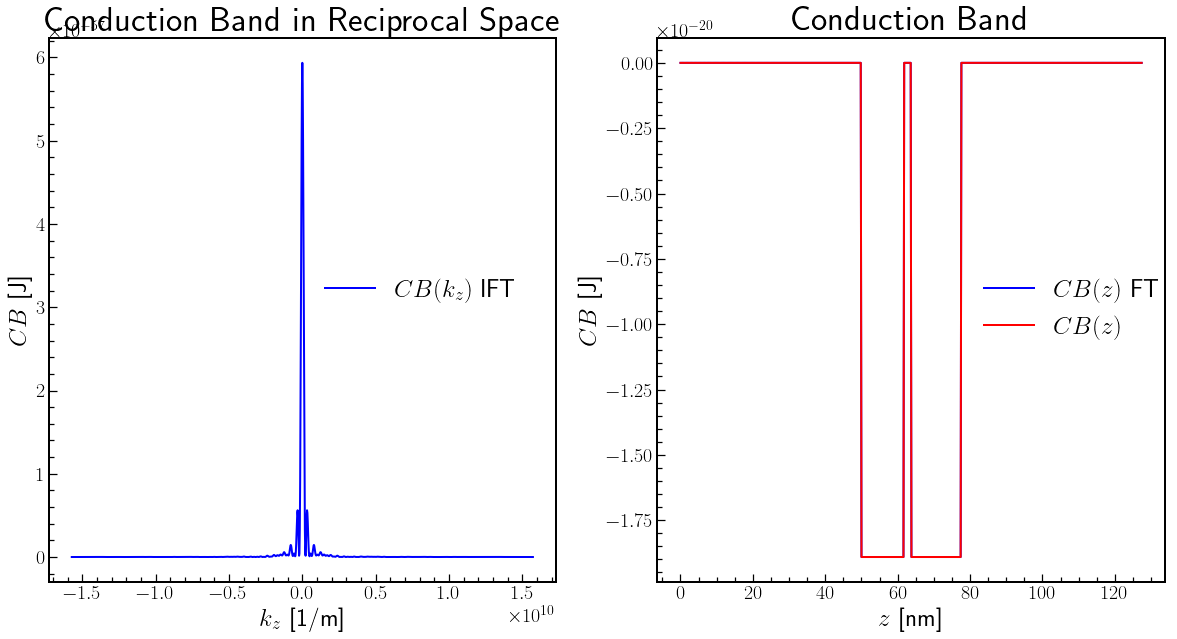

In [56]:
QW2=13.8


CQW =[

             [ 50.0, 'AlGaAs',   0.15,  'B'],
             [ 11.8, 'GaAs',     0.00,  'W'],
             [ 2.0, 'AlGaAs',   0.15,  'B'],
             [ QW2, 'GaAs',     0.00,  'W'],
             [ 50.0, 'AlGaAs',   0.15,  'B']
             ]

dK=(((QW2-11.8)/12)*(-0.2e7)+2.5e7)
Temp=19.0
dz=0.2

Vkz=str_cr.cr_V_k_z(Temp,dz,dK,CQW)
Vk=str_cr.cr_V_k(Temp,dz,dK,CQW)
CB=str_cr.cr_CB(Temp,dz,CQW)
zz=str_cr.cr_Zaxis(Temp,dz,CQW)

kzz=str_cr.cr_Kzaxis(Temp,dz,dK,CQW)


fig = plt.figure(figsize=(20,10))
spec = gridspec.GridSpec(1,2)
ax  = fig.add_subplot(spec[1])
ax1  = fig.add_subplot(spec[0])


ax.plot(zz[:]*1e9,np.real(Vkz[:]), lw = 2,ls='-', color = 'b',label = r'$CB(z)$ FT')
ax.plot(zz[:]*1e9,np.real(CB[:]), lw = 2,ls='-', color = 'r',label = r'$CB(z)$')


ax.set_title(r"Conduction Band", fontsize=35)
ax.set_xlabel('$z$ [nm]',fontsize = 25)
ax.set_ylabel(r'$CB$ [J]',fontsize =25)
ax.minorticks_on()
ax.ticklabel_format(style='sci', axis='y')
ax.tick_params(axis='both',which='minor',direction='in',length=5,width=1.25,labelsize=20)
ax.tick_params(axis='both',which='major',direction='in',length=8,width=1.25,labelsize=20)
ax.legend(fontsize=25,frameon=False,loc=2,bbox_to_anchor=(0.6,0.6))




ax1.plot(kzz[:],np.real(np.conjugate(Vk[:])*Vk[:]), lw = 2,ls='-', color = 'b',label = r'$CB(k_{z})$ IFT')

ax1.set_title(r"Conduction Band in Reciprocal Space", fontsize=35)
ax1.set_xlabel('$k_{z}$ [1/m]',fontsize = 25)
ax1.set_ylabel(r'$CB$ [J]',fontsize =25)
ax1.minorticks_on()
ax1.ticklabel_format(style='sci', axis='y')
#ax.set_xlim([-1e9,1e9])
ax1.tick_params(axis='both',which='minor',direction='in',length=5,width=1.25,labelsize=20)
ax1.tick_params(axis='both',which='major',direction='in',length=8,width=1.25,labelsize=20)
ax1.legend(fontsize=25,frameon=False,loc=2,bbox_to_anchor=(0.5,0.6))


plt.savefig('Conduction_Band_Transform_Example.pdf',dpi=300,bbox_inches='tight', pad_inches=0.0) 
plt.show()

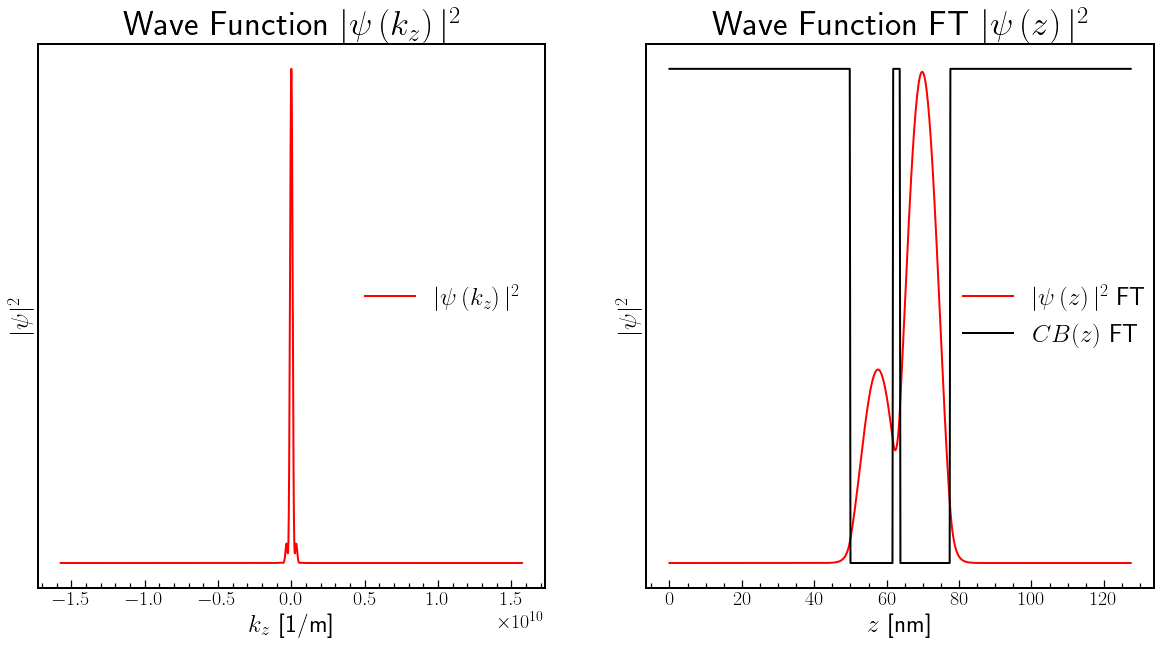

CPU times: user 29.7 s, sys: 748 ms, total: 30.4 s
Wall time: 13.6 s


In [57]:
%%time
QW2=13.8

CQW =[

             [ 50.0, 'AlGaAs',   0.15,  'B'],
             [ 11.8, 'GaAs',     0.00,  'W'],
             [ 2.0, 'AlGaAs',   0.15,  'B'],
             [ QW2, 'GaAs',     0.00,  'W'],
             [ 50.0, 'AlGaAs',   0.15,  'B']
             ]

dK=(((QW2-11.8)/12)*(-0.2e7)+2.5e7)
Temp=19.0
dz=0.2

H=H_cr.cr_Hamiltonian(Temp,dz,dK,CQW,0,0,(0),(0))

Energy,WF=LA.eigh(H, UPLO='U')

CB=str_cr.cr_V_k_z(Temp,dz,dK,CQW)
kzz=str_cr.cr_Kzaxis(Temp,dz,dK,CQW)

N=kzz.size

Wf0=np.zeros((N),dtype=complex)
Wf1=np.zeros((N),dtype=complex)
for i in range(N):
    Wf0[i]=WF[2*i,1]
    Wf1[i]=WF[2*i+1,1]


fig = plt.figure(figsize=(20,10))
spec = gridspec.GridSpec(1,2)
ax  = fig.add_subplot(spec[0])
ax1  = fig.add_subplot(spec[1])

ax.plot(kzz[:],np.real((np.conjugate(Wf0[:])*Wf0[:])/(1))
        , lw = 2, color = 'r',label = r'$ \vert \psi\left(k_{z}\right) \vert^{2}$')

ax.set_title(r"Wave Function $\vert \psi\left(k_{z}\right)\vert^{2}$", fontsize=35)
ax.set_xlabel('$k_{z}$ [1/m]',fontsize = 25)
ax.set_ylabel(r'$ \vert \psi \vert^{2}$',fontsize =25)
ax.minorticks_on()
ax.ticklabel_format(style='sci', axis='y')
ax.tick_params(axis='both',which='minor',direction='in',length=5,width=1.25,labelsize=20)
ax.tick_params(axis='both',which='major',direction='in',length=8,width=1.25,labelsize=20)
ax.legend(fontsize=25,frameon=False,loc=2,bbox_to_anchor=(0.6,0.6))
ax.tick_params(axis='y',which='both',right=False,left=False,labelright=False,labelleft=False)




zz=str_cr.cr_Zaxis(Temp,dz,CQW)

WF_R=np.zeros((zz.size),dtype=complex)

for i in range(zz.size):
    WF_R[i]=(1/(2*np.pi))*(np.trapz(((Wf0[:])*(np.cos((1)*(kzz[:])*(zz[i]))))+(1j)*((Wf0[:])*(np.sin((1)*(kzz)*(zz[i])))),kzz))




WF_R[:]=(WF_R[:])*2e-8


ax1.plot(zz[:]*1e9,np.real((np.conjugate(WF_R[:])*WF_R[:])), lw = 2, color = 'r',label = r'$ \vert \psi\left(z\right) \vert^{2}$ FT')
ax1.plot(zz[:]*1e9,np.real((np.real(CB[:])/q)-(CB.min())/q), lw = 2,ls='-', color = 'k',label = r'$CB(z)$ FT')

ax1.set_title(r"Wave Function FT $\vert \psi\left(z\right)\vert^{2}$", fontsize=35)
ax1.set_xlabel('$z$ [nm]',fontsize = 25)
ax1.set_ylabel(r'$ \vert \psi \vert^{2}$',fontsize =25)
ax1.minorticks_on()
ax1.ticklabel_format(style='sci', axis='y')
ax1.tick_params(axis='both',which='minor',direction='in',length=5,width=1.25,labelsize=20)
ax1.tick_params(axis='both',which='major',direction='in',length=8,width=1.25,labelsize=20)
ax1.legend(fontsize=25,frameon=False,loc=2,bbox_to_anchor=(0.58,0.6))
ax1.tick_params(axis='y',which='both',right=False,left=False,labelright=False,labelleft=False)


plt.savefig('WF_Example.pdf',dpi=300,bbox_inches='tight', pad_inches=0.0) 
plt.show()

In [52]:
%%time

sample="Example"
QW2=13.8
CQW =[

             [ 50.0, 'AlGaAs',   0.15,  'B'],
             [ 11.8, 'GaAs',     0.00,  'W'],
             [ 2.0, 'AlGaAs',   0.15,  'B'],
             [ QW2, 'GaAs',     0.00,  'W'],
             [ 50.0, 'AlGaAs',   0.15,  'B']
             ]

dK=(((QW2-11.8)/12)*(-0.2e7)+2.5e7)
Temp=19.0
dz=0.2

H=H_cr.cr_Hamiltonian(Temp,dz,dK,CQW,0,0,(0),(0))

Energy,WF=LA.eigh(H, UPLO='U')


kz=str_cr.cr_Kzaxis(Temp,dz,dK,CQW)
N=kz.size
WfkAux=np.zeros((2,N),dtype=complex)
for i in range(N):
    WfkAux[0,i]=WF[2*i,0]
    WfkAux[1,i]=WF[2*i,1]

Wfk=np.zeros((N),dtype=complex)

if (WfkAux[0,:].max()>=WfkAux[1,:].max()):
    Wfk[:]=WfkAux[0,:]
elif (WfkAux[0,:].max()<WfkAux[1,:].max()):
    Wfk[:]=WfkAux[1,:]


aa=np.real(np.trapz((np.conjugate(Wfk[:]))*(Wfk[:]),kz[:]))
aa=np.sqrt(aa)
Wfk[:]=(Wfk[:])/aa
#------------------------------------------------------------------------------------------
beta=np.real((gamma)*(np.trapz((np.conjugate(Wfk[:]))*((kz[:])**2)*(Wfk[:]),kz[:])))-beta3
#------------------------------------------------------------------------------------------


#------------------------------------------------------------------------------------------
z=str_cr.cr_Zaxis(Temp,dz,CQW)
Wfz=np.zeros((z.size),dtype=complex)
for i in range(z.size):
    Wfz[i]=np.trapz(((Wfk[:])*(np.cos((kz[:])*(z[i]))))+(1j)*((Wfk[:])*(np.sin((kz)*(z[i])))),kz[:])

aa=np.real(np.trapz((np.conjugate(Wfz[:]))*(Wfz[:]),z[:]))
aa=np.sqrt(aa)
Wfz[:]=(Wfz[:])/aa


interf=str_cr.cr_InterfacesIndex(dz,CQW)
CB=str_cr.cr_CB(Temp,dz,CQW)
CB[:]=CB[:]+np.abs(CB[:].min())

suma=0
for i in range(int((interf.size)/2)):
    suma+=(CB[interf[2*i+1]]-CB[interf[2*i]])*(((np.conjugate(Wfz[interf[2*i]]))*((Wfz[interf[2*i]]))+np.conjugate(Wfz[interf[2*i+1]])*(Wfz[interf[2*i+1]]))/2)*(1.5107432396624218e-14)

alpha=np.real(suma)
#------------------------------------------------------------------------------------------

Kas=51
deltaKas=(1.1e7)/(Kas-1)

kasEje=np.zeros((Kas))
for i in range(Kas):
    kasEje[i]=i*deltaKas

    
Angles=2
angleEje=np.array([((1*np.pi)/(4)),((3*np.pi)/(4))])




Dispersions=np.zeros((2,Angles,Kas))

CB=str_cr.cr_CB(Temp,dz,CQW)
CBcorrection=np.abs(CB.min())
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
for ii in range(Angles):
    for jj in range(Kas):
        H=H_cr.cr_Hamiltonian(Temp,dz,dK,CQW,alpha,beta,(kasEje[jj])*(np.cos(angleEje[ii])),(kasEje[jj])*(np.sin(angleEje[ii])))
        Energy,WF=LA.eigh(H, UPLO='U')
        Dispersions[0,ii,jj]=np.real(Energy[0])+CBcorrection
        Dispersions[1,ii,jj]=np.real(Energy[1])+CBcorrection


file = open("%s_ZMas.dat"%(sample),"w")
for ii in range(Angles):
    for jj in range(Kas):
        file.write("%e"%(Dispersions[0,ii,jj]))
        if (jj<Kas-1):
            file.write("\t")
    if (ii<Angles-1):
        file.write("\n")
file.close()

file = open("%s_ZMenos.dat"%(sample),"w")
for ii in range(Angles):
    for jj in range(Kas):
        file.write("%e"%(Dispersions[1,ii,jj]))
        if (jj<Kas-1):
            file.write("\t")
    if (ii<Angles-1):
        file.write("\n")
file.close()


file = open("%s_K.dat"%(sample),"w")
for i in range(Kas):
    file.write("%e"%(kasEje[i]))
    if (i<Kas-1):
        file.write("\n")
file.close()

file = open("%s_Angle.dat"%(sample),"w")
for i in range(Angles):
    file.write("%e"%(angleEje[i]))
    if (i<Angles-1):
        file.write("\n")
file.close()
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------

CPU times: user 30min 59s, sys: 31.6 s, total: 31min 30s
Wall time: 9min 11s


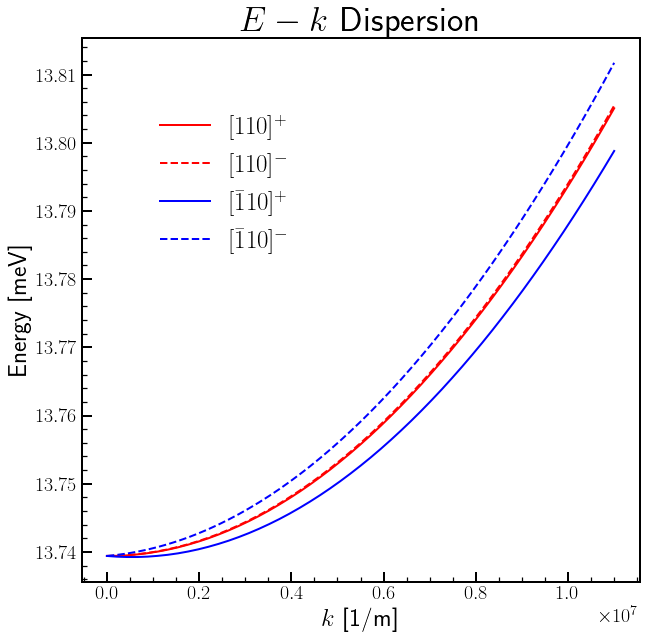

In [54]:
sample="Example"


file_path='%s_ZMas.dat'%(sample)
data=np.loadtxt(file_path) 

DispMas=np.zeros(np.shape(data))
DispMas[:,:]=data[:,:]


file_path='%s_ZMenos.dat'%(sample)
data=np.loadtxt(file_path) 

DispMenos=np.zeros(np.shape(data))
DispMenos[:,:]=data[:,:]



file_path='%s_K.dat'%(sample)
data=np.loadtxt(file_path)

K=np.zeros((data.size))
K[:]=(data[:])




fig = plt.figure(figsize=(10,10))
spec = gridspec.GridSpec(1,1)
ax  = fig.add_subplot(spec[0])

ax.plot(K,1e3*(DispMas[0,:])/q, lw = 2, color = 'r',label = r'$[110]^{+}$')
ax.plot(K,1e3*(DispMenos[0,:])/q, ls='--', lw = 2, color = 'r',label = r'$[110]^{-}$')
ax.plot(K,1e3*(DispMas[1,:])/q, lw = 2, color = 'b',label = r'$[\bar{1}10]^{+}$')
ax.plot(K,1e3*(DispMenos[1,:])/q, ls='--', lw = 2, color = 'b',label = r'$[\bar{1}10]^{-}$')

ax.set_title(r"$E-k$ Dispersion", fontsize=35)
ax.set_xlabel('$k$ [1/m]',fontsize = 25)
ax.set_ylabel(r'Energy [meV]',fontsize =25)
ax.minorticks_on()
ax.ticklabel_format(style='sci', axis='y')
ax.tick_params(axis='both',which='minor',direction='in',length=5,width=1.25,labelsize=20)
ax.legend(fontsize=25,frameon=False,loc=2,bbox_to_anchor=(0.1,0.9))

plt.savefig('Dispersion_Example.pdf',dpi=300,bbox_inches='tight', pad_inches=0.1) 
plt.show()